### GOES and AIA flare catalog production - Goal 1
This notebook contains some sample code to load up the AIA flare catalog, extract the entries which have an associate M/X GOES flare, and then plots the corresponding peak in each AIA channel along with markers for the start, peak and end times. You'll want to also have a copy of the catalog open so that you can make edits to it as needed. As you get accustomed to the data, it may be easier to transfer this code to a script, plot all of the peaks and then go through the generated plots one by one. 

In [1]:
## import packages
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
from datetime import datetime,timedelta
from helper import *

In [2]:
## load the AIA flare catalog 
flares = pd.read_csv('flare_catalogs/aia_flares_catalog_7_pred.csv')
lams = ['193','171','304','1600','131','94']

# convert all time columns to datetime objects
flares['aia_max_start_time'] = pd.to_datetime(flares['aia_max_start_time'])
flares['aia_min_end_time'] = pd.to_datetime(flares['aia_min_end_time'])
flares['goes_start_time'] = pd.to_datetime(flares['goes_start_time'])
flares['goes_end_time'] = pd.to_datetime(flares['goes_end_time'])
for lam in lams:
    flares[lam+'_start_time'] = pd.to_datetime(flares[lam+'_start_time'])
    flares[lam+'_peak_time'] = pd.to_datetime(flares[lam+'_peak_time'])
    flares[lam+'_end_time'] = pd.to_datetime(flares[lam+'_end_time'])

flares['mean_start_time']  = flares['aia_max_start_time']+flares[[lam+'_start_time'for lam in lams]].subtract(flares['aia_max_start_time'],axis=0).mean(axis=1)
flares['mean_peak_time']  = flares['aia_max_start_time']+flares[[lam+'_peak_time'for lam in lams]].subtract(flares['aia_max_start_time'],axis=0).mean(axis=1)
flares['mean_end_time']  = flares['aia_max_start_time']+flares[[lam+'_end_time'for lam in lams]].subtract(flares['aia_max_start_time'],axis=0).mean(axis=1)

# filter only events with associated GOES flare entry
flares_goes = flares[flares['goes_flare_ind'].notnull()]
# filter only M/X flares as given by GOES
flares_goes = flares_goes[np.logical_or(flares_goes['CMX']=='M',flares_goes['CMX']=='X')]
print(len(flares_goes),'flares in the AIA catalog with GOES M/X labels')


330 flares in the AIA catalog with GOES M/X labels


In [28]:
print(flares_goes[flares_goes['SHARP']==5144])

Empty DataFrame
Columns: [SHARP, goes_flare_ind, CMX, CMX_VALUE, goes_magnitude, goes_start_time, goes_end_time, 193_peak_time, 193_start_time, 193_end_time, 193_magnitude, 193_prominence, 171_peak_time, 171_start_time, 171_end_time, 171_magnitude, 171_prominence, 304_peak_time, 304_start_time, 304_end_time, 304_magnitude, 304_prominence, 1600_peak_time, 1600_start_time, 1600_end_time, 1600_magnitude, 1600_prominence, 131_peak_time, 131_start_time, 131_end_time, 131_magnitude, 131_prominence, 94_peak_time, 94_start_time, 94_end_time, 94_magnitude, 94_prominence, aia_max_start_time, aia_mean_peak_time, aia_min_end_time, 193_est_size, 193_sum_intensity, 171_est_size, 171_sum_intensity, 304_est_size, 304_sum_intensity, 1600_est_size, 1600_sum_intensity, 131_est_size, 131_sum_intensity, 94_est_size, 94_sum_intensity, Nx, Ny, LAT_FWT, LON_FWT, AREA_ACR, USFLUXL, MEANGAM, MEANGBT, MEANGBZ, MEANGBH, MEANJZD, TOTUSJZ, MEANALP, MEANJZH, ABSNJZH, SAVNCPP, MEANPOT, TOTPOT, MEANSHR, SHRGT45, R_VAL

In [4]:
aia_dir = '/srv/data/sdo_sharps/aia_timeseries/' # might need to change this to the path to the aia timeseries data

In [76]:
## loop through the catalog and plot event
#i=np.arange(0,330) #there are 330 flares in the catalogue (index 0-329)
# for i in range(len(flares_goes)):
for i in range(len(flares_goes)):
    flare = flares_goes.iloc[i]
# load AIA timeseries data
    with open(aia_dir+'sharp_'+str(flare['SHARP'])+'_aia_sum_intensity', "rb") as fp:   #Pickling
        aia_data = pickle.load(fp)
    with open(aia_dir+'sharp_'+str(flare['SHARP'])+'_aia_times', "rb") as fp:   #Pickling
        aia_times = pickle.load(fp)

    plot_flare(flare,aia_times,aia_data,window=60);
    output_filename = f'timeseries_data/plot-{i}.png'
    plt.savefig(output_filename) #save figures to directory
    plt.close('all')
# break


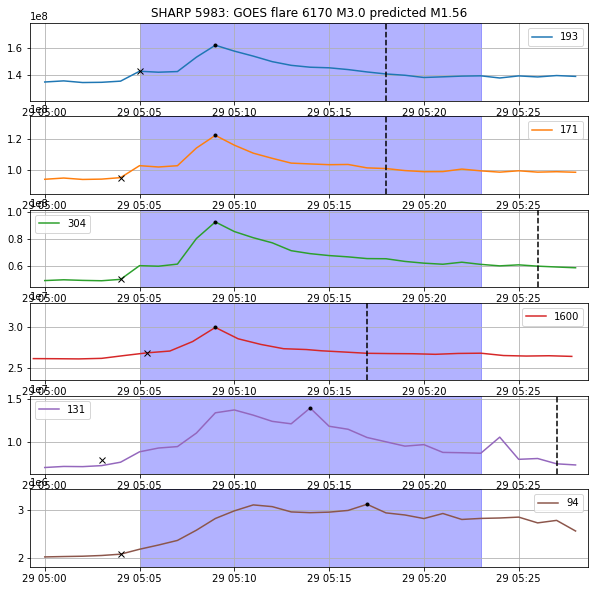

In [27]:
i = 65
flare = flares_goes.loc[13204]
# flare = flares_goes[flares_goes['goes_flare_ind']==6170]
# load AIA timeseries data
with open(aia_dir+'sharp_'+str(flare['SHARP'])+'_aia_sum_intensity', "rb") as fp:   #Pickling
    aia_data = pickle.load(fp)
with open(aia_dir+'sharp_'+str(flare['SHARP'])+'_aia_times', "rb") as fp:   #Pickling
    aia_times = pickle.load(fp)

plot_flare(flare,aia_times,aia_data,window=5);
output_filename = f'timeseries_data/plot-{i}.png'
# plt.savefig(output_filename, facecolor = 'white') #save figures to directory
# plt.close('all')